# 모델링: 함수 찾기
- 집의 평수를 알면 가격을 알 수 있을까?
- Y = aX + b
- 모델링: 데이터를 잘 설명하는 직선 하나를 찾는 것
---
## ANN 인공신경망
- 입력 `𝑥`에 대해 여러 층의 **선형 변환(가중합)**과 **비선형 변환(활성화 함수)**을 교차 적용해 목표 출력 `𝑦^`을 근사하는 함수 모델 <br>
<학습목표>
- 손실함수 `𝐿(𝜃)`(예: MSE, Cross-Entropy)을 최소화하도록 파라미터 `𝜃={𝑊,𝑏}`를 업데이트 <br>
<학습 메커니즘>
- **순전파**: `𝑦^`계산 → **손실** 계산 → **역전파**: `∂𝐿/∂𝜃` 구함 → **최적화**기: 파라미터 갱신

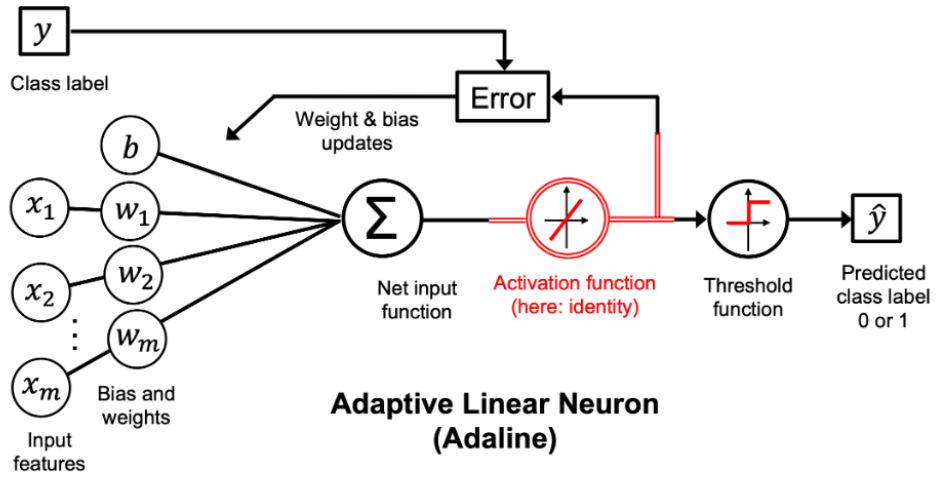

### 활성화 함수

- 비선형성을 부여해 다층 ANN이 고차원 관계를 학습하도록 함

| 함수             | 식/특성(핵심)                                | 장점                 | 단점                           | 주사용처/메모              |
| -------------- | --------------------------------------- | ------------------ | ---------------------------- | -------------------- |
| **ReLU**       | (\max(0,z))                             | 계산 빠름, 기울기 소실 완화   | **Dead ReLU**(영영 0), 음수 영역 0 | 기본값. He 초기화와 궁합 👍   |
| **Leaky ReLU** | (\max(\alpha z, z), \alpha\approx 0.01) | Dead ReLU 완화       | 여전히 비대칭                      | ReLU 대체 기본안          |
| **ELU**        | (z>0:z,\ z\le0:\alpha(e^{z}-1))         | 평균 0에 근접, 음수부 부드러움 | 비용↑                          | 안정성 필요한 깊은 MLP       |
| **GELU**       | (z\Phi(z)) (정규 CDF), 근사 사용              | SOTA 성능 빈번         | 느림                           | Transformer류(언어/비전)  |
| **SiLU/Swish** | (z \cdot \sigma(z))                     | 매끈, 경험상 성능 좋음      | 비용↑                          | CNN/MLP 최신 레시피       |
| **tanh**       | (\tanh(z)), 중심 0                        | 전통적 RNN            | 기울기 소실                       | 요즘은 적게 씀             |
| **sigmoid**    | (1/(1+e^{-z}))                          | 확률 해석              | 포화구간, 기울기 소실                 | **출력층 이진확률** 전용으로 남김 |
| **Softmax**    | ( \exp(z_i)/\sum_j \exp(z_j))           | 다중클래스 확률           | -                            | **출력층** 다중분류 전용      |


ANN  <br>
├─ 표현력: 깊이(층수), 너비(유닛수), 활성화 함수 <br>
├─ 손실함수 & 출력층 설계 (작업-정합) <br>
├─ 최적화: `SGD`, `Momentum`, `Adam`, `AdamW`... <br>
├─ 초기화: `Xavier`, `He`, `Kaiming`, `Orthogonal`... <br>
├─ 정규화/정렬화: `BatchNorm`, `LayerNorm`, `Dropout`, `L2` <br>
├─ 학습 안정화: `LR 스케줄`, `Gradient Clip`, `Early Stopping` <br>
├─ 데이터 측면: 스케일링, 증강, 샘플 불균형 처리 <br>
└─ 아키텍처 파생: MLP(DNN), CNN, RNN/LSTM/GRU, Transformer... <br>


### Softmax _vs._ Sigmoid
소프트맥스
- 확률: **전체 클래스**에 대해 0~1사이, 다 합치면 1이 됨 0.2 0.5 0.3
- 전체 클래스 중 한개 선택 -> 정답이 무조건 하나

<br>

시그모이드
- 확률: **각 클래스**에 대해 0~1사이로 변환 0.8 0.9 0.1
- 다중클래스 -> 정답이 여러 개일 수 있음

##### MINIST

In [37]:
# MNIST 데이터셋 로드
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape
# X,y = fetch_openml('mnist_784',version=1, return_X_y=True, parser='auto')


((60000, 28, 28), (60000,))

In [38]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
print(y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [39]:
# 스케일링
X_trian = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [40]:
model = tf.keras.Sequential([
    # input layer / 28*28->784 (2D->1D)
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten: 연산이 일어나지 않고 데이터의 모양만 바꿔줌

    # hidden layer
    tf.keras.layers.Dense(128, activation='relu'), #relu: 기울기 손실 최대한 방지 

    # out layer
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary() #모델구조

c:\python_src\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 모델을 학습 가능한 상태로 만들기
model.compile(
    optimizer ='adam', #빠르고 안정적
    loss = 'sparse_categorical_crossentropy', #손실함수
    metrics = ['accuracy'] #평가지표
)

In [42]:
# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs = 7,
    validation_data = (X_test, y_test),
    verbose = 1 #로그 출력
)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.8643 - loss: 2.5119 - val_accuracy: 0.2100 - val_loss: 2.2113
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9128 - loss: 0.3490 - val_accuracy: 0.1877 - val_loss: 2.2323
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9254 - loss: 0.2853 - val_accuracy: 0.1895 - val_loss: 2.2488
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9309 - loss: 0.2651 - val_accuracy: 0.1073 - val_loss: 2.2802
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9376 - loss: 0.2396 - val_accuracy: 0.0974 - val_loss: 2.3004
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9420 - loss: 0.2228 - val_accuracy: 0.0974 - val_loss: 2.3118
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9438 - loss: 0.2172 - val_accuracy: 0.0997 - val_loss: 2.3206


In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

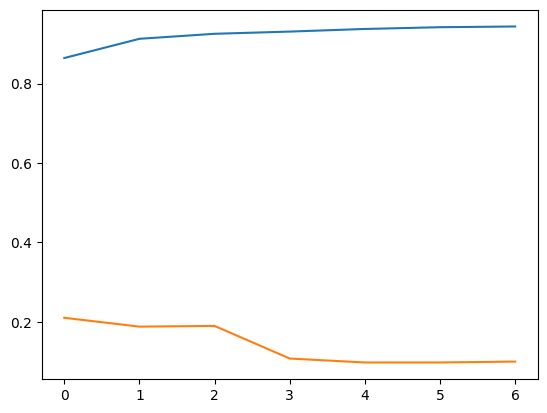

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

In [49]:
y_pred = model.predict(X_test)
y_pred[0], y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


(array([0.14201757, 0.05939053, 0.12237428, 0.08661162, 0.07885914,
        0.06535496, 0.06917574, 0.05176431, 0.21974567, 0.10470621],
       dtype=float32),
 np.uint8(7))

In [50]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0997 - loss: 2.3206


[2.320611000061035, 0.09969999641180038]

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.10      1.00      0.18       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.02     10000
weighted avg       0.11      0.10      0.02     10000



c:\python_src\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\python_src\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\python_src\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
